In [6]:
import pandas as pd

train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
#Checking for missing values

print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<Figure size 2000x800 with 0 Axes>

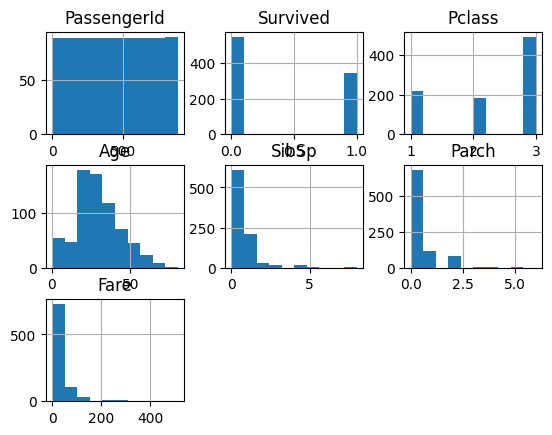

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
train.hist(bins=10)
plt.show()

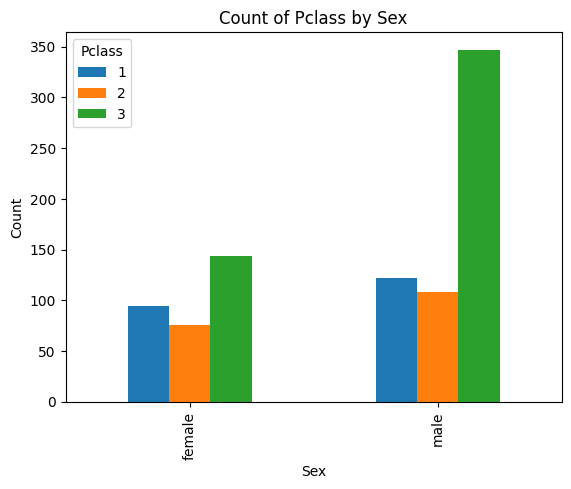

In [25]:
data = train.groupby(['Sex', 'Pclass']).size().unstack()

data.plot(kind='bar')

plt.title('Count of Pclass by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()

In [27]:
#
train['Age'].fillna(train['Age'].median(), inplace=True)

train['Fare'].fillna(train['Fare'].mean(), inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [28]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [29]:
train.drop('Cabin', axis=1, inplace=True)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
for column in train.columns:
    train[column] = Le.fit_transform(train[column])

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,2,108,1,28,1,0,523,18,2
1,1,1,0,190,0,51,1,0,596,207,0
2,2,1,2,353,0,34,0,0,669,41,2
3,3,1,0,272,0,47,1,0,49,189,2
4,4,0,2,15,1,47,0,0,472,43,2


In [35]:
#split data into train and test

from sklearn.model_selection import train_test_split

x = train.drop('Survived', axis=1)
y = train['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
#Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [40]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7877094972067039
Precision: 0.7571428571428571
Recall: 0.7162162162162162
F1 Score: 0.736111111111111


In [42]:
# LightGBM , XGBoost

import lightgbm as lgb
from xgboost import XGBClassifier

lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(x_train, y_train)

# XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(x_train, y_train)

# Predict on the test set
y_pred_lgb = lgb_model.predict(x_test)
y_pred_xgb = xgb_model.predict(x_test)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [96]:
# Evaluting XGboost and LGBM

accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)


model_metrics = {
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_lgb, accuracy_xgb],
    'Precision': [precision_lgb, precision_xgb],
    'Recall': [recall_lgb, recall_xgb],
    'F1-score': [f1_lgb, f1_xgb]
}

df_metrics = pd.DataFrame(model_metrics)

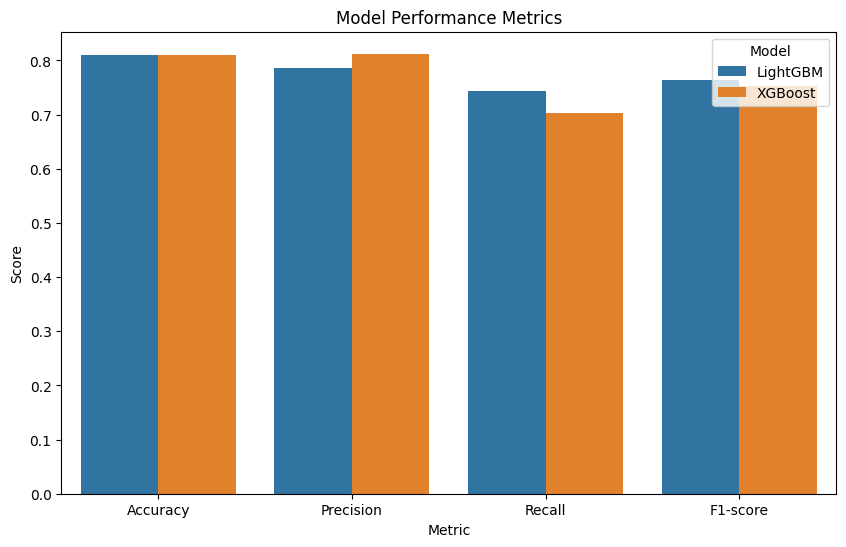

In [97]:
import seaborn as sns

df_melted = pd.melt(df_metrics, id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model')

# Add title and labels
plt.title('Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')

# Show the plot
plt.show()

In [55]:
from sklearn.model_selection import cross_val_score

#cross validation on xgboost and lgbm

lgb_scores = cross_val_score(lgb_model, x, y, cv=5)
print(f"\n lgbm cv scores: {lgb_scores}")
print(f"avg lgbm cv score: {lgb_scores.mean():.4f}")

xgb_scores = cross_val_score(xgb_model, x, y, cv=5)
print(f"\n xgbboost cv scores: {xgb_scores}")
print(f" avg xgboost cv score: {xgb_scores.mean():.4f}")

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [61]:
print(f"\n xgboost scores: {xgb_scores}")
print(f"avg xgboost cv score: {xgb_scores.mean():.4f}")

print(f"\n lgbm scores: {lgb_scores}")
print(f"avg lgbm score: {lgb_scores.mean():.4f}")



 xgboost scores: [0.61452514 0.80337079 0.83707865 0.83707865 0.86516854]
avg xgboost cv score: 0.7914

 lgbm scores: [0.65921788 0.80337079 0.83707865 0.82022472 0.86516854]
avg lgbm score: 0.7970


In [94]:
model_metrics = {
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_lgb, accuracy_xgb],
    'Precision': [precision_lgb, precision_xgb],
    'Recall': [recall_lgb, recall_xgb],
    'F1-score': [f1_lgb, f1_xgb]
}

pd.DataFrame(model_metrics)

,Model,Accuracy,Precision,Recall,F1-score
0,LightGBM,0.810056,0.785714,0.743243,0.763889
1,XGBoost,0.810056,0.812500,0.702703,0.753623


In [99]:
from sklearn.model_selection import GridSearchCV

lgb_param_grid = {
    'num_leaves': [31, 100],
    'max_depth': [5, 8, 10],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

lgb_grid_search = GridSearchCV(lgb_model, lgb_param_grid, cv=5)
lgb_grid_search.fit(x_train, y_train)

print(f"\nBest parameters for LightGBM model: {lgb_grid_search.best_params_}")

# Hyperparameter tuning for XGBoost model using GridSearchCV
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.01],
    'max_depth': [5, 8, 10],
    'subsample': [0.5, 0.7]
}

xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_grid_search.fit(x_train, y_train)

print(f"\nBest parameters for XGBoost model: {xgb_grid_search.best_params_}")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [100]:
model_metrics = {
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_lgb, accuracy_xgb],
    'Precision': [precision_lgb, precision_xgb],
    'Recall': [recall_lgb, recall_xgb],
    'F1-score': [f1_lgb, f1_xgb]
}

pd.DataFrame(model_metrics)

,Model,Accuracy,Precision,Recall,F1-score
0,LightGBM,0.810056,0.785714,0.743243,0.763889
1,XGBoost,0.810056,0.812500,0.702703,0.753623
